In [1]:
import numpy as np
import torch

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import utils.imgs as imgs

from utils.training import numpy_metrics

In [3]:
def softmax(x, axis=1):
    return np.exp(x) / np.sum(np.exp(x),axis=axis, keepdims=True)

In [4]:
Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]

label_colours = np.array([Sky, Building, Pole, Road, Pavement,
            Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])

In [5]:
def view_annotated(temp, alpha=None, plot=True):
    #emp = tensor.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0,11):
        r[temp==l]=label_colours[l,0]
        g[temp==l]=label_colours[l,1]
        b[temp==l]=label_colours[l,2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:,:,0] = (r/255.0)#[:,:,0]
    rgb[:,:,1] = (g/255.0)#[:,:,1]
    rgb[:,:,2] = (b/255.0)#[:,:,2]
    print(rgb.shape)
    
    if alpha is not None:
        rgb = np.append(rgb, np.expand_dims(alpha, 2), 2)
        
    if plot:
        plt.imshow(rgb)
        plt.show()
    else:
        return rgb

In [6]:
#use all seed 2 models
dropout = np.load('test_preds/drop_v3/preds.npz')
#swag_cov = np.load('test_preds/swag_cov/swag_50.npz')
swag = np.load('test_preds/swag_scale_05_v2/preds.npz')
swag_diag = np.load('test_preds/swag_diag_v2/preds.npz')
swa = np.load('test_preds/sgd/swa_1000_v2.npz')
sgd = np.load('test_preds/sgd/sgd_1000_v2.npz')

In [ ]:
print( dropout['targets'].shape )
print( swa['targets'].shape )
print( sgd['targets'].shape )

print((swa['targets']==sgd['targets']).mean())
print((dropout['targets']==sgd['targets']).mean())
print((swag['targets']==dropout['targets']).mean())
print((swag_diag['targets']==dropout['targets']).mean())
#print((swag_cov['targets']==dropout['targets']).mean())
#print((swag_cov['targets']==sgd['targets']).mean())

## Image Views 

In [9]:
targets = dropout['targets']

In [9]:
drop_im0 = dropout['predictions'][0]

swag_im0 = swag['predictions'][0]
swagdiag_im0 = swag_diag['predictions'][0]

In [29]:
sgd_unscaled_im0 = sgd['preds'][0]
swa_unscaled_im0 = swa['preds'][0]


In [30]:
# rescale sgd and swa
sgd_im0 = softmax(sgd_unscaled_im0,0)
swa_im0 = softmax(swa_unscaled_im0,0)

print(np.max(sgd_im0,0))

[[0.89555323 0.97786635 0.9917905  ... 0.9940098  0.9859773  0.9280585 ]
 [0.9762999  0.9973602  0.9994357  ... 0.99949795 0.998757   0.98675907]
 [0.9891467  0.99916995 0.9998121  ... 0.9998109  0.9994426  0.99455255]
 ...
 [0.9797151  0.9981986  0.9997014  ... 0.9999508  0.9996535  0.99684507]
 [0.9672829  0.9964493  0.9994109  ... 0.99987113 0.9991848  0.9953517 ]
 [0.9284542  0.9900254  0.9978742  ... 0.99933326 0.9976711  0.98858005]]


(360, 480, 3)


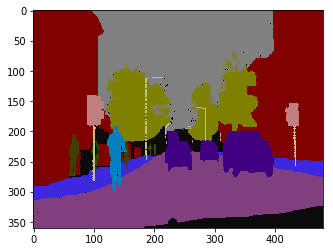

In [15]:
view_annotated(targets[0])

In [18]:
def rgb_image(pred):
    pred_image = np.argmax(pred,axis=0)
    pred_probs = np.max(pred, axis=0)
    rgb_drop = view_annotated(pred_image, pred_probs, plot=False)
    return rgb_drop

In [33]:
drop_rgb = rgb_image(drop_im0)
swag_rgb = rgb_image(swag_im0)
sgd_rgb = rgb_image(sgd_im0)
swa_rgb = rgb_image(swa_im0)
swag_diag_rgb = rgb_image(swagdiag_im0)
target_rgb = view_annotated(targets[0], plot=False)

(360, 480, 3)
(360, 480, 3)
(360, 480, 3)
(360, 480, 3)
(360, 480, 3)
(360, 480, 3)


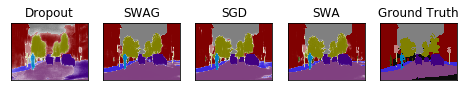

In [34]:

f, axarr = plt.subplots(1,5)
axarr[0].imshow(drop_rgb)
axarr[0].set_title('Dropout')
axarr[0].get_xaxis().set_ticks([])
axarr[0].get_yaxis().set_ticks([])

axarr[1].imshow(swag_rgb)
axarr[1].set_title('SWAG')
axarr[1].get_xaxis().set_ticks([])
axarr[1].get_yaxis().set_ticks([])

axarr[2].imshow(sgd_rgb)
axarr[2].set_title('SGD')
axarr[2].get_xaxis().set_ticks([])
axarr[2].get_yaxis().set_ticks([])

axarr[3].imshow(swa_rgb)
axarr[3].set_title('SWA')
axarr[3].get_xaxis().set_ticks([])
axarr[3].get_yaxis().set_ticks([])

axarr[4].imshow(target_rgb)
axarr[4].set_title('Ground Truth')
axarr[4].get_xaxis().set_ticks([])
axarr[4].get_yaxis().set_ticks([])

fig = plt.gcf()
fig.set_size_inches(8, 1.5)
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/segment_qual_unc.pdf')

In [36]:
np.savez('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/data/segmentation/qualitative.npz',
        drop_rgb=drop_rgb,
        target_rgb=target_rgb,
        swa_rgb=swa_rgb,
        swag_rgb=swag_rgb,
        swag_diag_rgb=swag_diag_rgb,
        sgd_rgb=sgd_rgb)

## Calibration

In [7]:
def compute_accuracy_by_entropy(entropy, preds, labels, bins=None):
    if bins is None:
        bins = np.percentile(entropy, np.arange(100))
    digitized = np.digitize(entropy, bins)
    accuracy = [np.sum(preds[digitized==i]==labels[digitized==i])/np.sum(digitized==i) for i in range(1, len(bins))]
    return accuracy, bins

In [8]:
swag_predictions = swag['predictions']
drop_predictions = dropout['predictions']
swag_diag_predictions = swag_diag['predictions']

swa_logits = swa['preds']
sgd_logits = sgd['preds']

swa_predictions = softmax(swa_logits, 1)
sgd_predictions = softmax(sgd_logits, 1)

In [10]:
bins = np.arange(0.1, 1.05, 0.05)

In [13]:
swag_diag_as_3d = swag_diag_predictions.reshape((swag_diag_predictions.shape[0], swag_diag_predictions.shape[1], -1))
swag_as_3d = swag_predictions.reshape((swag_predictions.shape[0], swag_predictions.shape[1], -1))
drop_as_3d = drop_predictions.reshape((drop_predictions.shape[0], drop_predictions.shape[1], -1))

swa_as_3d = swa_predictions.reshape((swa_predictions.shape[0], swa_predictions.shape[1], -1))
sgd_as_3d = sgd_predictions.reshape((sgd_predictions.shape[0], sgd_predictions.shape[1], -1))

targets_2d = targets.reshape((targets.shape[0], -1))

swag_acc, bins = compute_accuracy_by_entropy(np.max(swag_as_3d,1), np.argmax(swag_as_3d,1), 
                                             targets_2d, bins = bins)
swag_diag_acc, bins = compute_accuracy_by_entropy(np.max(swag_diag_as_3d, 1), np.argmax(swag_diag_as_3d, 1), 
                                                  targets_2d, bins = bins)

drop_acc, bins = compute_accuracy_by_entropy(np.max(drop_as_3d,1), np.argmax(drop_as_3d,1), 
                                             targets_2d, bins = bins)

swa_acc, bins = compute_accuracy_by_entropy(np.max(swa_as_3d,1), np.argmax(swa_as_3d,1), 
                                            targets_2d, bins = bins)

sgd_acc, bins = compute_accuracy_by_entropy(np.max(sgd_as_3d,1), np.argmax(sgd_as_3d,1), 
                                            targets_2d, bins = bins)

/home/wesley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """


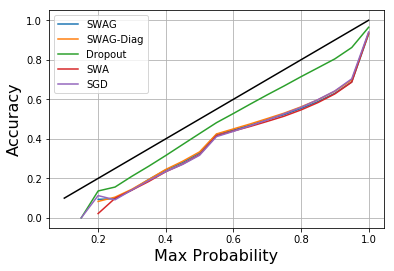

In [15]:
#plt.rcParams["figure.figsize"] = (4,4)

plt.plot(bins[1:], swag_acc, label = 'SWAG')
plt.plot(bins[1:], swag_diag_acc, label = 'SWAG-Diag')
plt.plot(bins[1:], drop_acc, label = 'Dropout')
plt.plot(bins[1:], swa_acc, label = 'SWA')
plt.plot(bins[1:], sgd_acc, label = 'SGD')
plt.plot(np.arange(0.1,1.01,.01), np.arange(0.1,1.01,.01), c='black')

plt.xlabel('Max Probability', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.grid()
plt.legend()
plt.savefig('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/pics/segmentation_cal.pdf')

In [16]:
np.savez('/home/wesley/Documents/Papers/udl_paper_source/icml/plots/data/segmentation/calibration_mp.npz',
        swag_acc=swag_acc, swag_diag_acc=swag_diag_acc, drop_acc=drop_acc, swa_acc=swa_acc, sgd_acc=sgd_acc)

## Entropies

In [8]:
dropout.keys()

['predictions', 'targets']

In [11]:
drop_ent = -np.sum(np.log(dropout['predictions']+1e-10) * dropout['predictions'], 1)
swag_ent = -np.sum(np.log(swag['predictions']+1e-10) * dropout['predictions'], 1)

In [16]:
swa_preds = softmax(swa['preds'],1)
swa_ent = -np.sum(np.log(swa_preds + 1e-10) * swa_preds, 1)

sgd_preds = softmax(sgd['preds'], 1)
sgd_ent = -np.sum(np.log(sgd_preds + 1e-10) * sgd_preds, 1)

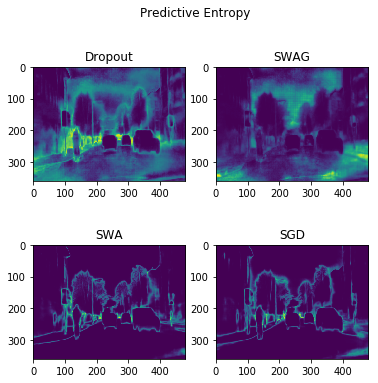

In [22]:
f, axarr = plt.subplots(2,2)
#f.tight_layout()
#f.subplots_adjust(top=2.25,bottom=0.0)

f.suptitle('Predictive Entropy')

axarr[0,0].imshow(drop_ent[0])
axarr[0,0].set_title('Dropout')

axarr[0,1].imshow(swag_ent[0])
axarr[0,1].set_title('SWAG')

axarr[1,0].imshow(swa_ent[0])
axarr[1,0].set_title('SWA')

axarr[1,1].imshow(sgd_ent[0])
axarr[1,1].set_title('SGD')

fig = plt.gcf()
fig.set_size_inches(6,6)

## Mutual Information

In [7]:

for i in range(14):
    print(i)
    f_loc = 'swag_preds_testpred_'+str(i)+'.npz'
    fdict = np.load(f_loc)
    
    if i == 0:
        neg_entropies = np.sum(np.log(fdict['predictions'] + 1e-7) * fdict['predictions'], axis=1)
        predictions = fdict['predictions']
        
    else:
        neg_entropies += np.sum(np.log(fdict['predictions'] + 1e-7) * fdict['predictions'], axis=1)
        predictions += fdict['predictions']

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [8]:
predictions /= 14
neg_entropies /= 14

entropy = -np.sum(np.log(predictions + 1e-7) * predictions, axis = 1)

mutual_info = entropy + neg_entropies

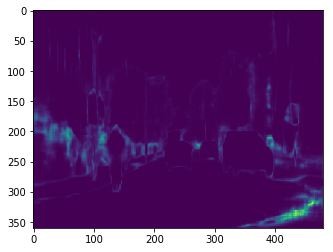

In [9]:
plt.imshow(mutual_info[0])

In [12]:
for i in range(14):
    print(i)
    f_loc = 'old_testpreds/dropout_preds_testpred_'+str(i)+'.npz'
    fdict = np.load(f_loc)
    
    if i == 0:
        dneg_entropies = np.sum(np.log(fdict['predictions'] + 1e-7) * fdict['predictions'], axis=1)
        dpredictions = fdict['predictions']
        
    else:
        dneg_entropies += np.sum(np.log(fdict['predictions'] + 1e-7) * fdict['predictions'], axis=1)
        dpredictions += fdict['predictions']

0
1
2
3
4
5
6
7
8
9
10
11
12
13


In [13]:
dpredictions /= 14
dneg_entropies /= 14

dentropy = -np.sum(np.log(dpredictions + 1e-7) * dpredictions, axis = 1)

dmutual_info = dentropy + dneg_entropies

Text(0.5,1,'Dropout')

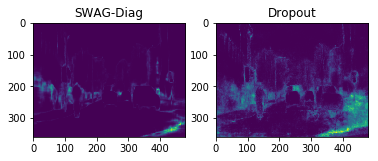

In [16]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(mutual_info[0])
axarr[0].set_title('SWAG-Diag')
axarr[1].imshow(dmutual_info[0])
axarr[1].set_title('Dropout')

In [25]:
swa['preds'].shape

(233, 11, 360, 480)